In [1]:
# Import the libraries needed

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Wrangle Function

In [2]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    return df

In [3]:
df = wrangle("data/data.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### Drop high and low cardinality variable

In [4]:
df.drop(columns = ["date", "street", "statezip", "country"], inplace=True)

In [5]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond


In [6]:
df["city"].value_counts(normalize=True).round(2)

Seattle                0.34
Renton                 0.06
Bellevue               0.06
Redmond                0.05
Issaquah               0.04
Kirkland               0.04
Kent                   0.04
Auburn                 0.04
Sammamish              0.04
Federal Way            0.03
Shoreline              0.03
Woodinville            0.02
Maple Valley           0.02
Mercer Island          0.02
Burien                 0.02
Snoqualmie             0.02
Kenmore                0.01
Des Moines             0.01
North Bend             0.01
Covington              0.01
Duvall                 0.01
Lake Forest Park       0.01
Bothell                0.01
Newcastle              0.01
SeaTac                 0.01
Tukwila                0.01
Vashon                 0.01
Enumclaw               0.01
Carnation              0.00
Normandy Park          0.00
Clyde Hill             0.00
Medina                 0.00
Fall City              0.00
Black Diamond          0.00
Ravensdale             0.00
Pacific             

Our data set is imbalance in term of the city seattle has the highest proportion that means we may want to care less about maybe a city impacts the price of our datasets, so we have to drop the city columns

In [7]:
df.drop(columns = "city", inplace=True)

## Check the colinearity of the predictor variable with the target variable

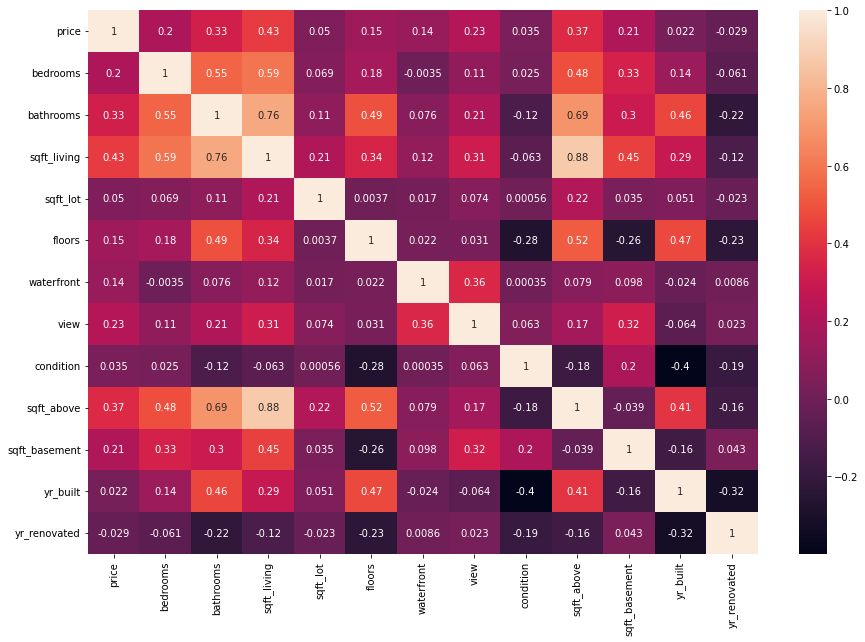

In [8]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(df.corr(), annot=True, ax=ax);

We can see from the above visualizations that only a small percent of our predictor variable are correlated with the targer variable. 

Let's continue our EDA by checking the distribution of our features

 It seems there are some outliers with our data sets. Let's start by exploring the distribution of the target variable

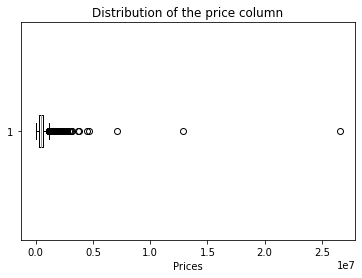

In [9]:
plt.boxplot(df["price"], vert=False)
plt.xlabel("Prices")
plt.title("Distribution of the price column");

Haha We definitely have some outliers in our price column, but it seems like our boxplot does not gives us more details too that extent let's check our 5 number summary to grok what's going one here.

In [10]:
df["price"].describe().apply("{0:,.0f}".format)

count         4,600
mean        551,963
std         563,835
min               0
25%         322,875
50%         460,943
75%         654,962
max      26,590,000
Name: price, dtype: object

Definitely we have some outliers it's very much impossible for the price of a house to be 0 dollars, so therefore we need to do some clipping

## Removing Outliers from the price column

In [11]:
q1, q2 = df["price"].quantile([0.1, 0.9])
mask_price= df["price"].between(q1, q2)
df = df[mask_price]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3683 entries, 0 to 4597
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          3683 non-null   float64
 1   bedrooms       3683 non-null   float64
 2   bathrooms      3683 non-null   float64
 3   sqft_living    3683 non-null   int64  
 4   sqft_lot       3683 non-null   int64  
 5   floors         3683 non-null   float64
 6   waterfront     3683 non-null   int64  
 7   view           3683 non-null   int64  
 8   condition      3683 non-null   int64  
 9   sqft_above     3683 non-null   int64  
 10  sqft_basement  3683 non-null   int64  
 11  yr_built       3683 non-null   int64  
 12  yr_renovated   3683 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 402.8 KB


Let's visualize the target variable again to see how it is distributed

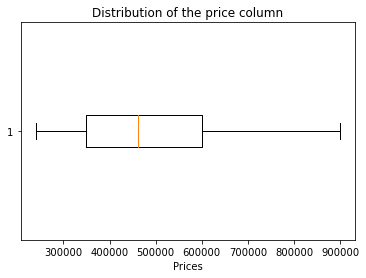

In [13]:
plt.boxplot(df["price"], vert=False)
plt.xlabel("Prices")
plt.title("Distribution of the price column");

This is more like it

In [14]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994


Since we've dropped some outliers in the price column. I will love to check the correlation in the variable once again.

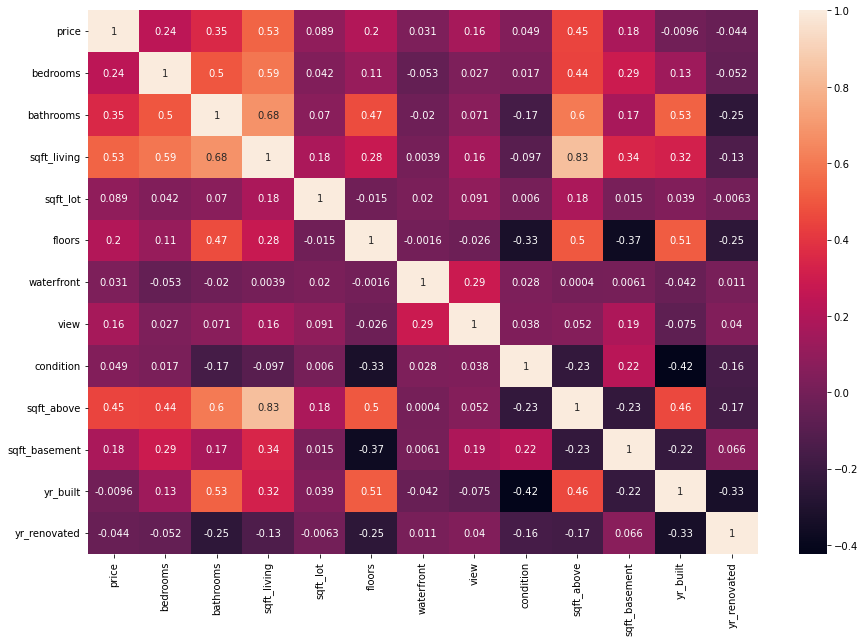

In [15]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(df.corr(), annot=True, ax=ax);

We can see that sqft_living, sqft_above and yr_renovated have a bit of correlation with the price column. Let's check their distribution

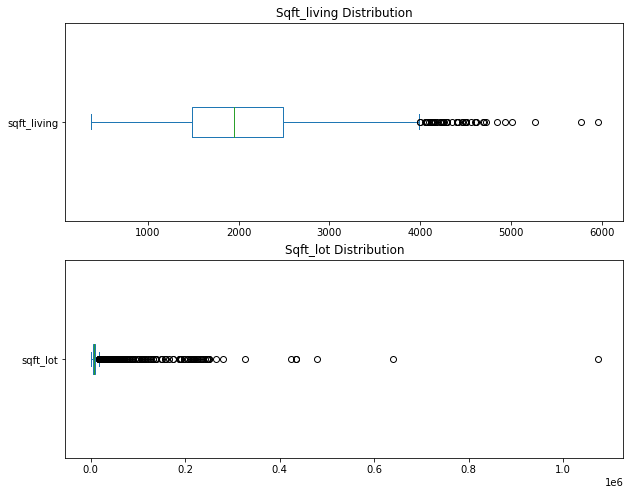

In [16]:
fig, (ax0, ax1) = plt.subplots(figsize = (10, 8), nrows = 2, ncols= 1)
df["sqft_living"].plot(kind = "box", ax=ax0, vert=False, title = "Sqft_living Distribution")
df["sqft_lot"].plot(kind = "box", ax=ax1, vert=False, title = "Sqft_lot Distribution");

Looking at this we can see that the Sqft_lot Distribution has a lot of outliers. Let's check it 5 number summary.


In [17]:
df["sqft_lot"].describe().apply("{0:,.0f}".format)

count        3,683
mean        14,344
std         36,479
min            638
25%          4,863
50%          7,410
75%         10,462
max      1,074,218
Name: sqft_lot, dtype: object

That's a whole lot of outliers which won't make our model perform well. Let's perform some clipping

### Removing Sqft_lot outliers

In [18]:
q1, q2 = df["sqft_lot"].quantile([0.1, 0.9])
mask_sqft_lot= df["sqft_lot"].between(q1, q2)
df = df[mask_sqft_lot]

In [19]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994


Let's check the sqft_lot one more time

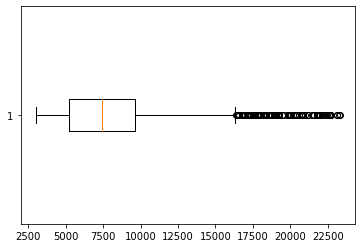

In [20]:
plt.boxplot(x = "sqft_lot", data=df, vert=False);

This is still okay. Now let's build our model

### Performing Vertical Split on our dataset

In [21]:
target = "price"
X = df.drop(columns = target)
y = df[target]

### Performing Horizontal split on our dataset

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Build Model

#### Baseline Model

In [23]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
print(f"The Mean Price is ${round(y_mean, 2)}")
print(f"Mean Abosulute Error of our baseline: {mean_absolute_error(y_train, y_pred_baseline).round(2)}")

The Mean Price is $483524.74
Mean Abosulute Error of our baseline: 142542.81


In [24]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_preds = model.predict(X_train)
print(f"Mean Abosulute Error of our Model: {mean_absolute_error(y_train, y_preds).round(2)}")

Mean Abosulute Error of our Model: 39581.92


Our Model_performed well than our baseline. We can see that the MAE is reduced to that of the baseline

### Evaluate the model

In [25]:
y_preds_test =model.predict(X_test)
print(f"Mean Abosulute Error of our Model: {mean_absolute_error(y_test, y_preds_test).round(2)}")

Mean Abosulute Error of our Model: 108748.23


Our model was able to generalize a little bit

### Communicate Results

#### Let's check it importances to know model

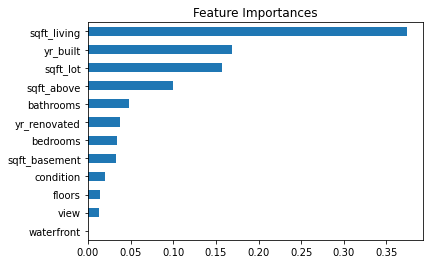

In [26]:
imp = model.feature_importances_
feat_importances = pd.Series(imp, index=X_train.columns).sort_values(ascending=True)
feat_importances.plot(kind = "barh", title = "Feature Importances");

We can see as we predicted before that the sqft_living, sqft_lot as an  impact on the price of the house